In [1]:
#Checking for gpu
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-1ed7c120-106f-7799-fa88-1f3b88461f4d)


In [2]:
#importing pandas for reading csv file and converting into dataFrame
import pandas as pd

In [3]:
df=pd.read_csv("/content/newdata.csv",delimiter=';')


In [4]:
# Assuming your single column is named 'data'
df_new = df['timeOpen'].str.split(';', expand=True)
df_new.columns=['timeOpen'	,'timeClose'	,'timeHigh',	'timeLow'	,'name'	,'open'	,'high'	,'low'	,'close'	,'volume','marketCap','timestamp']
df_new=df_new.drop(columns=['timeOpen','timeClose','timeHigh','timeLow','name','volume','marketCap'])
df_new=df_new.rename(columns={'timestamp':'Date','open':'24h Open (USD)','low':'24h Low (USD)','high':'24h High (USD)','close':'Closing Price (USD)'})


In [5]:
df_new['Date']=df_new['Date'].str.replace('T23:59:59.999Z','')



In [6]:
# Assuming the columns you want to convert are 'column1', 'column2', etc.
df_new['24h Open (USD)'] = df_new['24h Open (USD)'].astype(float)
df_new['24h High (USD)'] = df_new['24h High (USD)'].astype(float)
df_new['24h Low (USD)'] = df_new['24h Low (USD)'].astype(float)
df_new['Closing Price (USD)'] = df_new['Closing Price (USD)'].astype(float)
df_new['Date'] = df_new['Date'].str.strip('"')
df_new['Date'] = pd.to_datetime(df_new['Date'], format='%Y-%m-%d').dt.date
df_new=df_new.set_index('Date')
#forget to add 19-05-2021 data sp
new_row = {'Date': '2021-05-19', '24h Open (USD)': 42944.98, '24h High (USD)':43546.12, '24h Low (USD)':30681.50 , 'Closing Price (USD)':37002.44}
df_new.loc['2021-05-19'] = new_row
df_new

,24h Open (USD),24h High (USD),24h Low (USD),Closing Price (USD)
Date,,,,
2024-08-09,61728.208980,61751.864441,59587.859790,60880.112203
2024-08-08,55030.029026,62673.763977,54766.728423,61710.137564
2024-08-07,56040.632123,57726.881052,54620.509521,55027.460692
2024-08-06,53991.347588,57059.918617,53973.272276,56034.316591
2024-08-05,58110.298456,58268.827409,49121.237378,53991.457797
...,...,...,...,...
2021-05-23,37531.448453,38289.218120,31227.339433,34770.583623
2021-05-22,37371.029906,38831.054439,35383.683751,37536.631112
2021-05-21,40596.948323,42172.173616,33616.453884,37304.690671


In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1179 entries, 2024-08-09 to 2021-05-19
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   24h Open (USD)       1179 non-null   float64
 1   24h High (USD)       1179 non-null   float64
 2   24h Low (USD)        1179 non-null   float64
 3   Closing Price (USD)  1179 non-null   float64
dtypes: float64(4)
memory usage: 46.1+ KB


In [8]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

# Parse dates and set date column to index
df_old = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df_old.drop(columns=['Currency'],inplace=True)
df_old.head()

--2024-08-22 08:28:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2024-08-22 08:28:37 (5.22 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,
2013-10-01,123.65499,124.30466,124.75166,122.56349
2013-10-02,125.45500,123.65499,125.75850,123.63383
2013-10-03,108.58483,125.45500,125.66566,83.32833
2013-10-04,118.67466,108.58483,118.67500,107.05816
2013-10-05,121.33866,118.67466,121.93633,118.00566


In [9]:
df_old = df_old[::-1]


In [10]:
df_old.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2021-05-18 to 2013-10-01
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Closing Price (USD)  2787 non-null   float64
 1   24h Open (USD)       2787 non-null   float64
 2   24h High (USD)       2787 non-null   float64
 3   24h Low (USD)        2787 non-null   float64
dtypes: float64(4)
memory usage: 108.9 KB


In [11]:
concatenated_df = pd.concat([df_new, df_old])
concatenated_df.index = pd.to_datetime(concatenated_df.index)
concatenated_df.index = concatenated_df.index.strftime('%Y-%m-%d')
concatenated_df


,24h Open (USD),24h High (USD),24h Low (USD),Closing Price (USD)
Date,,,,
2024-08-09,61728.208980,61751.864441,59587.859790,60880.112203
2024-08-08,55030.029026,62673.763977,54766.728423,61710.137564
2024-08-07,56040.632123,57726.881052,54620.509521,55027.460692
2024-08-06,53991.347588,57059.918617,53973.272276,56034.316591
2024-08-05,58110.298456,58268.827409,49121.237378,53991.457797
...,...,...,...,...
2013-10-05,118.674660,121.936330,118.005660,121.338660
2013-10-04,108.584830,118.675000,107.058160,118.674660
2013-10-03,125.455000,125.665660,83.328330,108.584830


In [12]:
bit_df=concatenated_df
bitcoin_prices = pd.DataFrame(bit_df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices=bitcoin_prices[::-1]
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2024-08-05,53991.457797
2024-08-06,56034.316591
2024-08-07,55027.460692


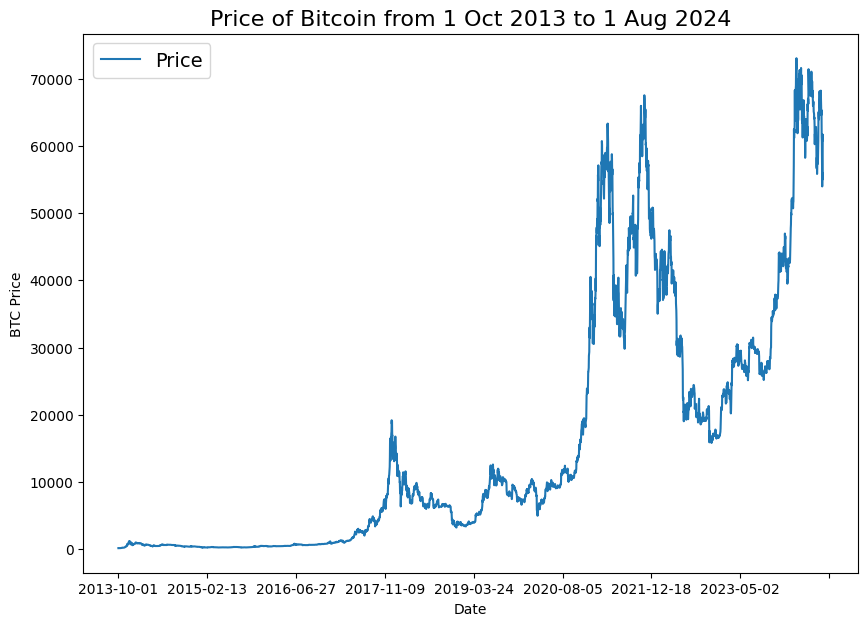

In [13]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 1 Aug 2024", fontsize=16)
plt.legend(fontsize=14)

In [14]:
# # Convert index to DatetimeIndex
# concatenated_df.index = pd.to_datetime(concatenated_df.index)

# # Extract year from the DatetimeIndex
# concatenated_df['Year'] = concatenated_df.index.year
# import matplotlib.pyplot as plt

# # Assuming 'Year' column is already created and index is DatetimeIndex
# plt.figure(figsize=(10, 6))
# plt.scatter(concatenated_df['Year'], concatenated_df['Closing Price (USD)'])
# plt.xlabel('Year')
# plt.ylabel('Closing Price (USD)')
# plt.title('Year vs Closing Price Scatter Plot')
# plt.grid(True)
# plt.show()

In [15]:
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2024-08-05,53991.457797
2024-08-06,56034.316591
2024-08-07,55027.460692


In [16]:

# Only want closing price for each day
bitcoin_prices = pd.DataFrame(bit_df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
timesteps= pd.to_datetime(timesteps)
from datetime import datetime

prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10],prices[:10]


(DatetimeIndex(['2024-08-09', '2024-08-08', '2024-08-07', '2024-08-06',
                '2024-08-05', '2024-08-04', '2024-08-03', '2024-08-02',
                '2024-08-01', '2024-07-31'],
               dtype='datetime64[ns]', freq=None),
 array([60880.11220322, 61710.13756445, 55027.46069179, 56034.31659146,
        53991.4577965 , 58116.97696104, 60680.09469878, 61415.06457269,
        65357.50156255, 64619.24964922]))

In [17]:

# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2, # 20% test
                                                    shuffle=True,
                                                    random_state=42 # set random state
                                                   )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3172,), (794,), (3172,), (794,))

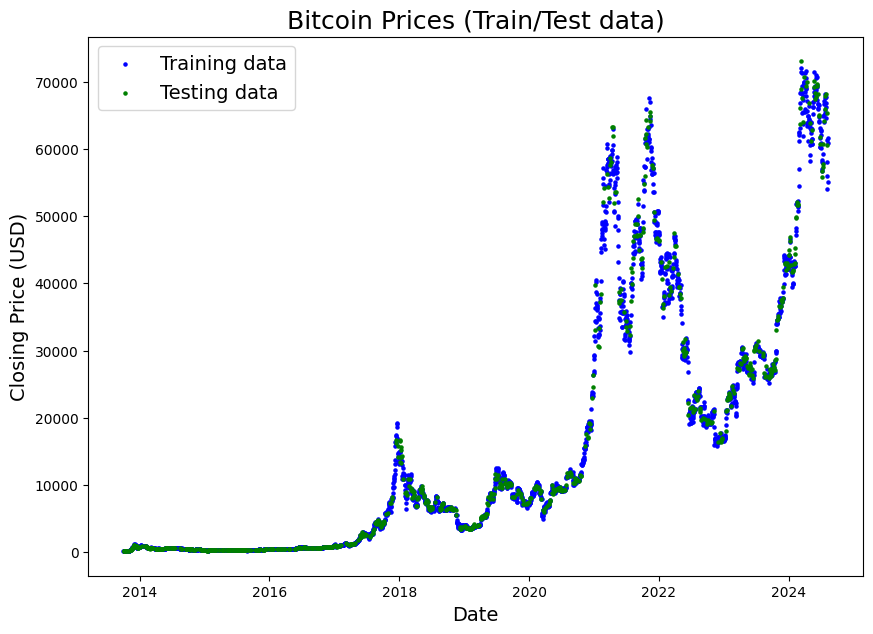

In [18]:

# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train,s=5, c="b", label="Training data")
plt.scatter(X_test, y_test,s=5, c="g", label="Testing data")
plt.legend(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Closing Price (USD)", fontsize=14)
plt.title("Bitcoin Prices (Train/Test data)", fontsize=18)
plt.show()

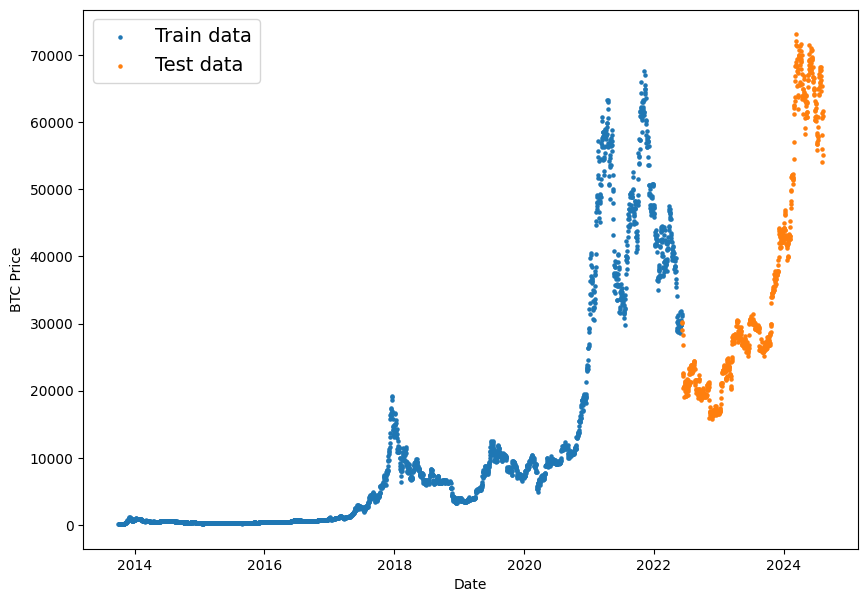

In [19]:
import numpy as np
sorted_indices = np.argsort(timesteps)
timesteps = timesteps[sorted_indices]
prices = prices[sorted_indices]
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]


plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train,s=5 ,label="Train data")
plt.scatter(X_test, y_test,s=5 ,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [20]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

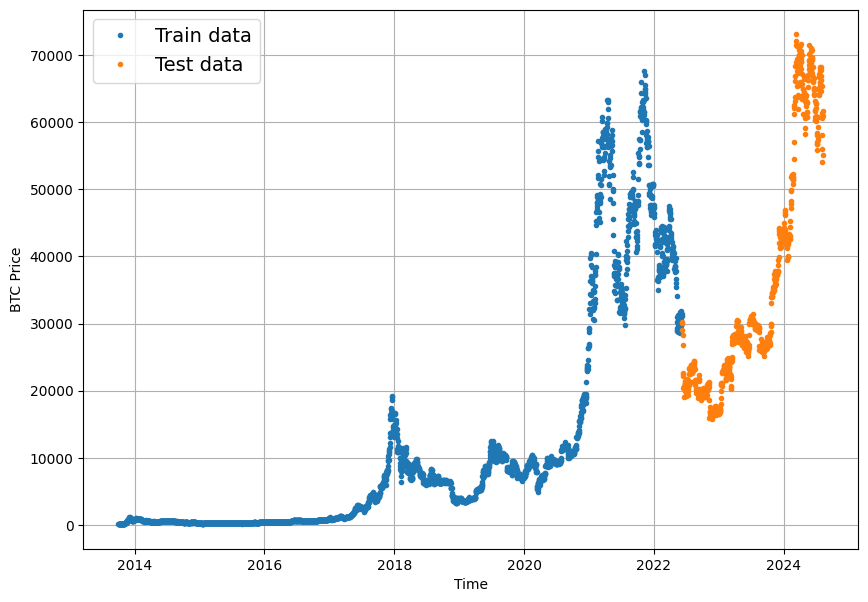

In [21]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")

plot_time_series(timesteps=X_test, values=y_test, label="Test data")

#Horizon = number of timesteps to predict into future
#Window = number of timesteps from past used to predict horizon
For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

# Model 0: Naïve forecast (baseline)

As usual, let's start with a baseline.
One of the most common baseline models for time series forecasting, the naïve model (also called the naïve forecast), requires no training at all.

That's because all the naïve model does is use the previous timestep value to predict the next timestep value.

The formula looks like this:

In English:
The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (the previous timestep).

In an open system (like a stock market or crypto market), you'll often find beating the naïve forecast with any kind of model is quite hard.
Note: For the sake of this notebook, an open system is a system where inputs and outputs can freely flow, such as a market (stock or crypto). Where as, a closed system the inputs and outputs are contained within the system (like a poker game with your buddies, you know the buy in and you know how much the winner can get). Time series forecasting in open systems is generally quite poor.

In [22]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([30214.35624202, 30111.99792242, 29083.80472095, 28360.81135854,
        26762.6490379 , 22487.38792585, 22206.79279006, 22572.83982319,
        20381.6512129 , 20471.48189249]),
 array([66201.0162264 , 64619.24964922, 65357.50156255, 61415.06457269,
        60680.09469878, 58116.97696104, 53991.4577965 , 56034.31659146,
        55027.46069179, 61710.13756445]))

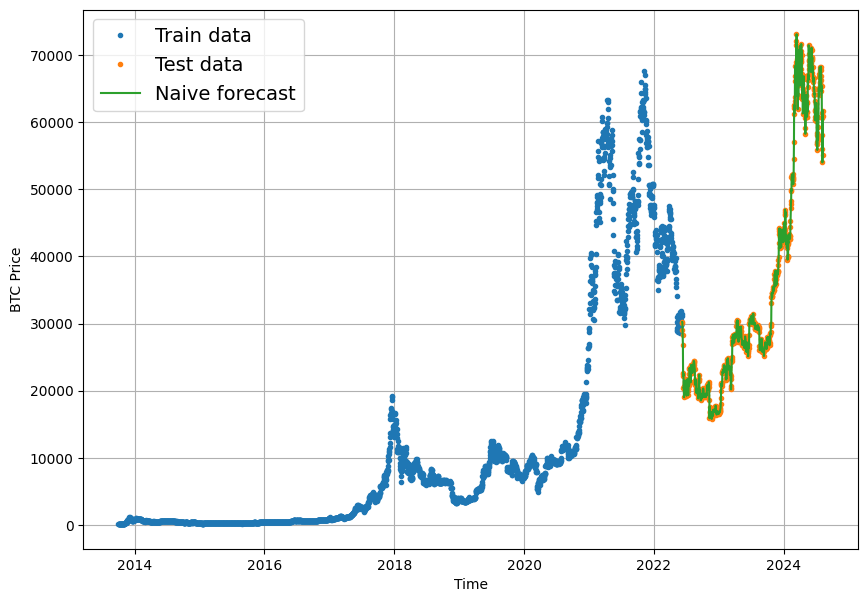

In [23]:

# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

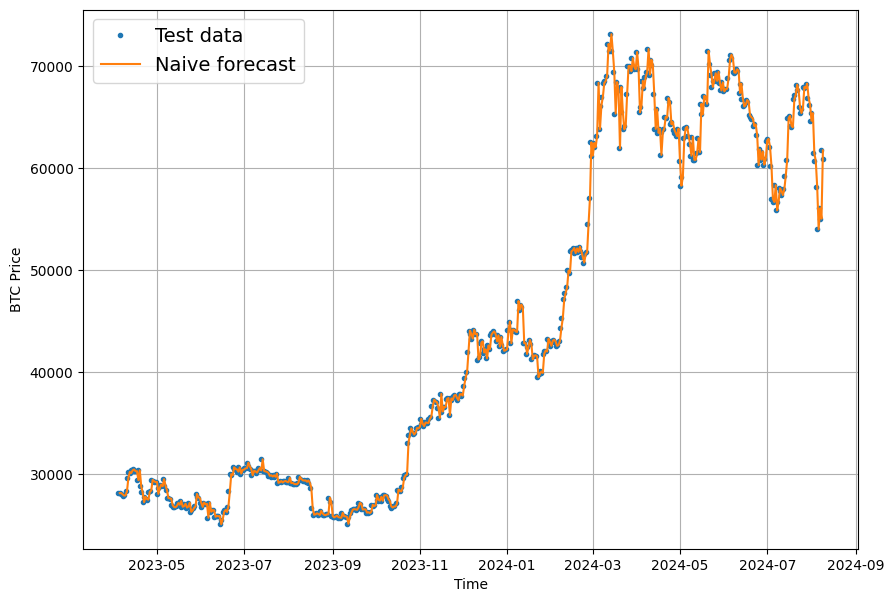

In [24]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset ,label="Naive forecast");


In [25]:
import tensorflow as tf
from tensorflow import keras



In [26]:

# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [27]:
import tensorflow as tf

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.MeanAbsoluteError()(y_true, y_pred)  # Ensure correct usage
  mse = tf.keras.metrics.MeanSquaredError()(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.MeanAbsolutePercentageError()(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {
      "mae": mae.numpy(),
      "mse": mse.numpy(),
      "rmse": rmse.numpy(),
      "mape": mape.numpy(),
      "mase": mase.numpy()
  }

naive_results = evaluate_preds(y_true=y_test[1:],
                             y_pred=naive_forecast)
naive_results


{'mae': 671.4369,
 'mse': 1222896.1,
 'rmse': 1105.8463,
 'mape': 1.8352402,
 'mase': 0.99893093}

In [28]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

35268.500993043825

Windowing is a method to turn a time series dataset into supervised learning problem.

Window for one week with the target of predicting the next day (Bitcoin prices)

[123.654, 125.455, 108.584, 118.674, 121.338, 120.655, 121.795] -> [123.033]

[125.455, 108.584, 118.674, 121.338, 120.655, 121.795, 123.033] -> [124.049]

[108.584, 118.674, 121.338, 120.655, 121.795, 123.033, 124.049] -> [125.961]


In [29]:

HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [30]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.
  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]


In [31]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [32]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  #print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  #print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [33]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3959, 3959)

In [34]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [35]:
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [64619.24964922 65357.50156255 61415.06457269 60680.09469878
 58116.97696104 53991.4577965  56034.31659146] -> Label: [55027.46069179]
Window: [65357.50156255 61415.06457269 60680.09469878 58116.97696104
 53991.4577965  56034.31659146 55027.46069179] -> Label: [61710.13756445]
Window: [61415.06457269 60680.09469878 58116.97696104 53991.4577965
 56034.31659146 55027.46069179 61710.13756445] -> Label: [60880.11220322]


# Turning windows into training and test sets

In [36]:

# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [37]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(3167, 792, 3167, 792)

In [38]:
train_windows[-5:], train_labels[-5:]

(array([[29445.95762392, 31726.39068587, 31792.30994328, 29799.07971352,
         30467.48774143, 29704.39135707, 29832.91422532],
        [31726.39068587, 31792.30994328, 29799.07971352, 30467.48774143,
         29704.39135707, 29832.91422532, 29906.66174779],
        [31792.30994328, 29799.07971352, 30467.48774143, 29704.39135707,
         29832.91422532, 29906.66174779, 31370.67194769],
        [29799.07971352, 30467.48774143, 29704.39135707, 29832.91422532,
         29906.66174779, 31370.67194769, 31155.47870185],
        [30467.48774143, 29704.39135707, 29832.91422532, 29906.66174779,
         31370.67194769, 31155.47870185, 30214.35624202]]),
 array([[29906.66174779],
        [31370.67194769],
        [31155.47870185],
        [30214.35624202],
        [30111.99792242]]))

In [39]:
test_windows[-5:], test_labels[-5:]

(array([[66819.91618636, 66201.0162264 , 64619.24964922, 65357.50156255,
         61415.06457269, 60680.09469878, 58116.97696104],
        [66201.0162264 , 64619.24964922, 65357.50156255, 61415.06457269,
         60680.09469878, 58116.97696104, 53991.4577965 ],
        [64619.24964922, 65357.50156255, 61415.06457269, 60680.09469878,
         58116.97696104, 53991.4577965 , 56034.31659146],
        [65357.50156255, 61415.06457269, 60680.09469878, 58116.97696104,
         53991.4577965 , 56034.31659146, 55027.46069179],
        [61415.06457269, 60680.09469878, 58116.97696104, 53991.4577965 ,
         56034.31659146, 55027.46069179, 61710.13756445]]),
 array([[53991.4577965 ],
        [56034.31659146],
        [55027.46069179],
        [61710.13756445],
        [60880.11220322]]))

# Make a modelling checkpoint

In [40]:
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name) + ".keras", # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

# Model 1:Dense Model(Window=7,Horizon=1)
A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation

An output layer with linear activation (or no activation)

Adam optimizer and MAE loss function

Batch size of 128

100 epochs

In [41]:
import os
import tensorflow as tf
from tensorflow.keras import layers

# Create a model
Model_1=tf.keras.Sequential(
    [  layers.Dense(128,activation='relu'),
        layers.Dense(1,activation='linear')
    ] ,name='Model_1_dense'
)
Model_1.compile(loss='mae',optimizer='adam',metrics=['mae'])
# Fit model
Model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=Model_1.name)]) # create ModelCheckpoint callback to save best model


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 3961.3354 - mae: 3961.3354 - val_loss: 1785.4365 - val_mae: 1785.4365
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 725.8238 - mae: 725.8238 - val_loss: 1312.2227 - val_mae: 1312.2227
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 629.9078 - mae: 629.9078 - val_loss: 1395.5863 - val_mae: 1395.5863
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 585.3505 - mae: 585.3505 - val_loss: 1200.2970 - val_mae: 1200.2970
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 549.7159 - mae: 549.7159 - val_loss: 1076.4191 - val_mae: 1076.4191
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 509.8382 - mae: 509.8382 - val_loss: 1162.0034 - val_mae: 1162.0034
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 507.4197 - mae: 507.4197 - val_loss: 969.7503 - val_mae: 969.7503
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 474.0532 - mae: 474.0532 - val_loss: 917.5833 - val

In [42]:
Model_1.evaluate(test_windows, test_labels)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 554.0026 - mae: 554.0026  


[745.1508178710938, 745.1508178710938]

In [43]:
# Load in saved best performing model_1 and evaluate on test data
Model_1 = tf.keras.models.load_model("model_experiments/Model_1_dense.keras")
Model_1.evaluate(test_windows, test_labels)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 519.8300 - mae: 519.8300


[670.5432739257812, 670.5432739257812]

In [44]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [45]:
model_1_preds=make_preds(Model_1,test_windows)
model_1_preds[-5:]

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([58743.25 , 54397.03 , 55692.934, 55069.633, 60515.215],
      dtype=float32)>

In [46]:
y_test[-5:]

array([53991.4577965 , 56034.31659146, 55027.46069179, 61710.13756445,
       60880.11220322])

In [47]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 670.5433,
 'mse': 1237532.6,
 'rmse': 1112.4445,
 'mape': 1.8581951,
 'mase': 0.9982701}

In [48]:
naive_results

{'mae': 671.4369,
 'mse': 1222896.1,
 'rmse': 1105.8463,
 'mape': 1.8352402,
 'mase': 0.99893093}

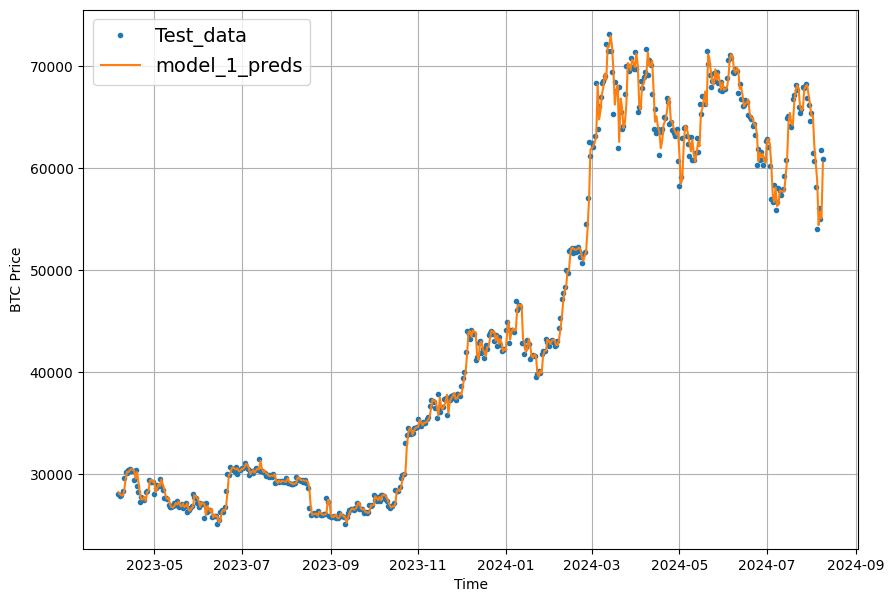

In [49]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

# Model 2: Dense(window=30,Horizon=1)
we'll use the previous 30 days of Bitcoin prices to try and predict the next day price.

In [50]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
#len(full_windows), len(full_labels)
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
Model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="Model_2_dense")

Model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

Model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=Model_2.name)])

In [51]:
# Evaluate model 2 preds
Model_2.evaluate(test_windows, test_labels)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 544.0087  


727.3856201171875

In [52]:
model_2_preds=make_preds(Model_2,test_windows)
model_2_preds[-5:]

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([58667.02 , 54178.984, 55041.39 , 54648.33 , 59126.105],
      dtype=float32)>

In [53]:
# Load in best performing model
Model_2 = tf.keras.models.load_model("model_experiments/Model_2_dense.keras")
Model_2.evaluate(test_windows, test_labels)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 525.8491


695.019775390625

In [54]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 727.3856,
 'mse': 1333487.9,
 'rmse': 1154.7675,
 'mape': 2.0241425,
 'mase': 1.091546}

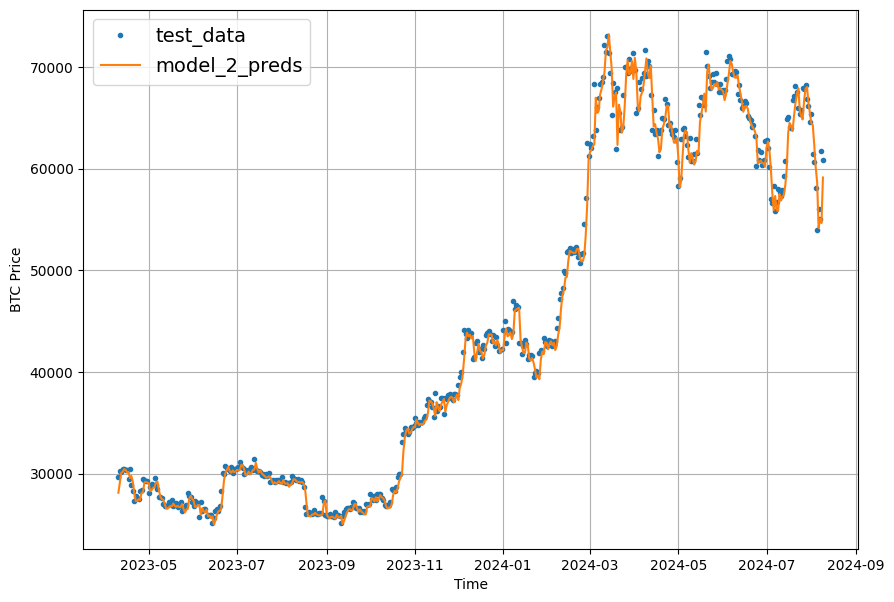

In [55]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

# Model 3:Dense (Window=30,Horizon=7)

In [56]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)



(3930, 3930)

In [57]:
#And we'll split the full dataset windows into training and test set
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(3144, 786, 3144, 786)

In [58]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [59]:
model_3.evaluate(test_windows, test_labels)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1157.1134  


1449.5390625

In [60]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense.keras")
model_3.evaluate(test_windows, test_labels)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1145.2372


1431.7001953125

In [61]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[-5:]

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[67920.78 , 67155.8  , 67320.7  , 69154.14 , 64982.223, 67127.555,
        66933.734],
       [67004.59 , 65779.55 , 67091.94 , 68062.06 , 64918.867, 66604.71 ,
        66891.66 ],
       [65580.97 , 64344.71 , 65511.08 , 66569.   , 63963.797, 65502.93 ,
        66833.46 ],
       [65448.727, 65004.48 , 65300.27 , 67367.66 , 63831.76 , 64607.09 ,
        66109.164],
       [63113.227, 62394.79 , 63430.22 , 64533.203, 61452.92 , 62159.348,
        63168.934]], dtype=float32)>

In [62]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1431.7001,
 'mse': 4962194.5,
 'rmse': 2227.5984,
 'mape': 4.059879,
 'mase': 2.1692584}

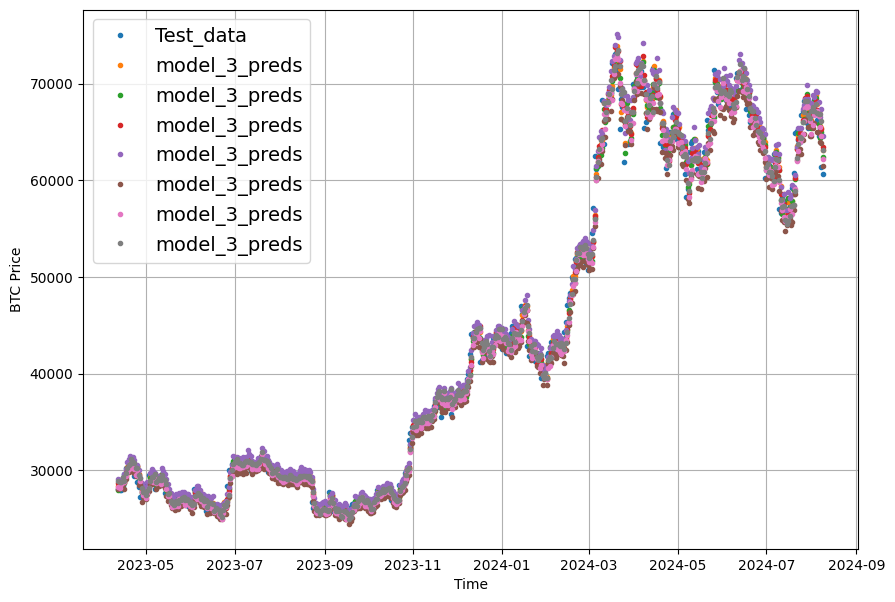

In [63]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

Aggregating the predictions (e.g. reducing a 7-day horizon to one value such as the mean) loses information from the original prediction. As in, the model predictions were trained to be made for 7-days but by reducing them to one, we gain the ability to plot them visually but we lose the extra information contained across multiple days.

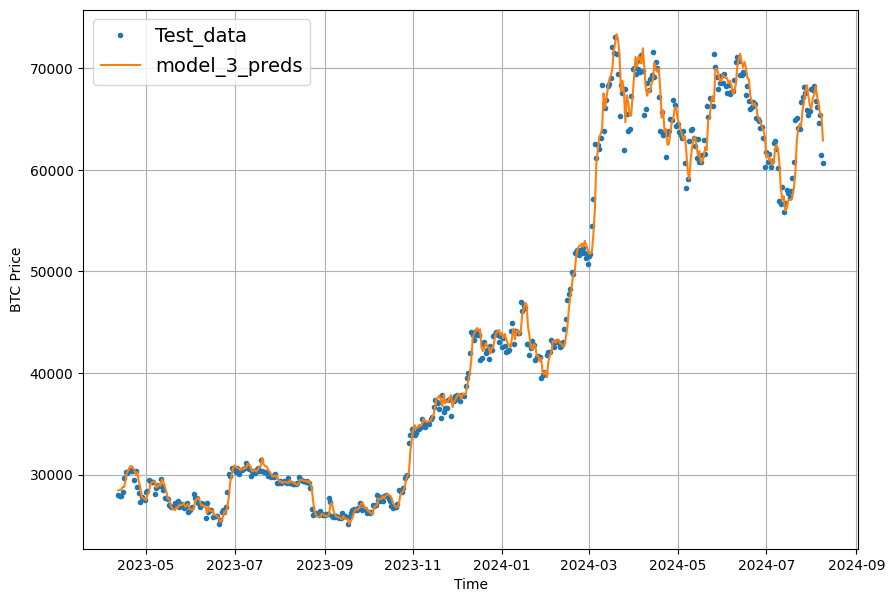

In [64]:

offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

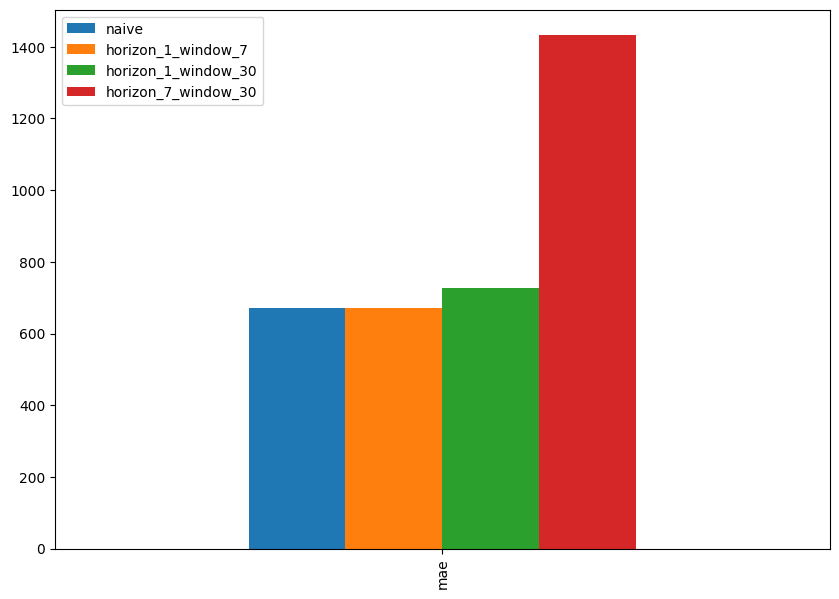

In [65]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

# Model 4:Conv1D
In our case, the input sequence is the previous 7 days of Bitcoin price data and the output is the next day (in seq2seq terms this is called a many to one problem).

In [66]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [67]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3959, 3959)

In [68]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(3167, 792, 3167, 792)

# Data windowed!

Now, since we're going to be using Conv1D layers, we need to make sure our input shapes are correct.

The Conv1D layer in TensorFlow takes an input of: (batch_size, timesteps, input_dim).

In our case, the batch_size (by default this is 32 but we can change it) is handled for us but the other values will be:

* timesteps = WINDOW_SIZE - the timesteps is also often referred to as features, our features are the previous WINDOW_SIZE values of Bitcoin
* input_dim = HORIZON - our model views WINDOW_SIZE (one week) worth of data at a time to predict HORIZON (one day)
Right now, our data has the timesteps dimension ready but we'll have to adjust it to have the input_dim dimension.

In [69]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

To fix this, we could adjust the shape of all of our train_windows or we could use a tf.keras.layers.Lamdba (called a Lambda layer) to do this for us in our model.

The Lambda layer wraps a function into a layer which can be used with a model.

Let's try it out.

In [70]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [71]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [72]:
model_4.summary()

Model: "model_4_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)                    │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 128)              │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [73]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[-10:]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([65937.24 , 64460.406, 64827.418, 61496.277, 60304.906, 57888.96 ,
       54172.46 , 55265.42 , 54517.195, 60596.   ], dtype=float32)>

In [74]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 687.78485,
 'mse': 1262510.6,
 'rmse': 1123.615,
 'mape': 1.8945227,
 'mase': 1.0239384}

# Model 5 (RNN:LSTM)

In [75]:
WINDOW_SIZE

7

In [76]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [77]:
# model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_lstm.keras")
# model_5.evaluate(test_windows, test_labels)

In [78]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[-10:]

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([67090.984, 65724.95 , 65310.05 , 62993.824, 61294.42 , 59174.727,
       55655.67 , 55287.67 , 54635.953, 58653.23 ], dtype=float32)>

In [79]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 731.1692,
 'mse': 1395503.4,
 'rmse': 1181.3142,
 'mape': 2.040265,
 'mase': 1.0885268}

In [80]:
test_labels.shape
tf.squeeze(test_labels).shape


TensorShape([792])

# Model 6(Dense:Multivariate)

What would be better is if we passed our model something related to Bitcoin

we could try to see if the Bitcoin block reward size adds any predictive power to our model(s).

What is the Bitcoin block reward size?

The Bitcoin block reward size is the number of Bitcoin someone receives from mining a Bitcoin block.

At its inception, the Bitcoin block reward size was 50.

But every four years or so, the Bitcoin block reward halves.

For example, the block reward size went from 50 (starting January 2009) to 25 on November 28 2012.

Let's encode this information into our time series data and see if it helps a model's performance

In [81]:
bit_df.head()

,24h Open (USD),24h High (USD),24h Low (USD),Closing Price (USD)
Date,,,,
2024-08-09,61728.208980,61751.864441,59587.859790,60880.112203
2024-08-08,55030.029026,62673.763977,54766.728423,61710.137564
2024-08-07,56040.632123,57726.881052,54620.509521,55027.460692
2024-08-06,53991.347588,57059.918617,53973.272276,56034.316591
2024-08-05,58110.298456,58268.827409,49121.237378,53991.457797


In [82]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020
block_reward_5= 3.125 # 19 April 2024

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")
block_reward_5_datetime = np.datetime64("2024-04-19")

In [83]:
block_reward_4_datetime.dtype

dtype('<M8[D]')

In [84]:
index_0_datetime = np.datetime64(bitcoin_prices.index[0])

In [85]:
#Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime -index_0_datetime).astype('timedelta64[D]').astype(int)
block_reward_3_days = (block_reward_4_datetime -index_0_datetime).astype('timedelta64[D]').astype(int)
block_reward_4_days = (block_reward_5_datetime -index_0_datetime).astype('timedelta64[D]').astype(int)
block_reward_2_days,block_reward_3_days

(-2953, -1551)

In [86]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:block_reward_4_days, -1] = block_reward_4
bitcoin_prices_block.iloc[block_reward_4_days:, -1] = block_reward_5
bitcoin_prices_block.head()


,Price,block_reward
Date,,
2024-08-09,60880.112203,25
2024-08-08,61710.137564,25
2024-08-07,55027.460692,25
2024-08-06,56034.316591,25
2024-08-05,53991.457797,25


In [87]:
bitcoin_prices.head()

,Price
Date,
2024-08-09,60880.112203
2024-08-08,61710.137564
2024-08-07,55027.460692
2024-08-06,56034.316591
2024-08-05,53991.457797


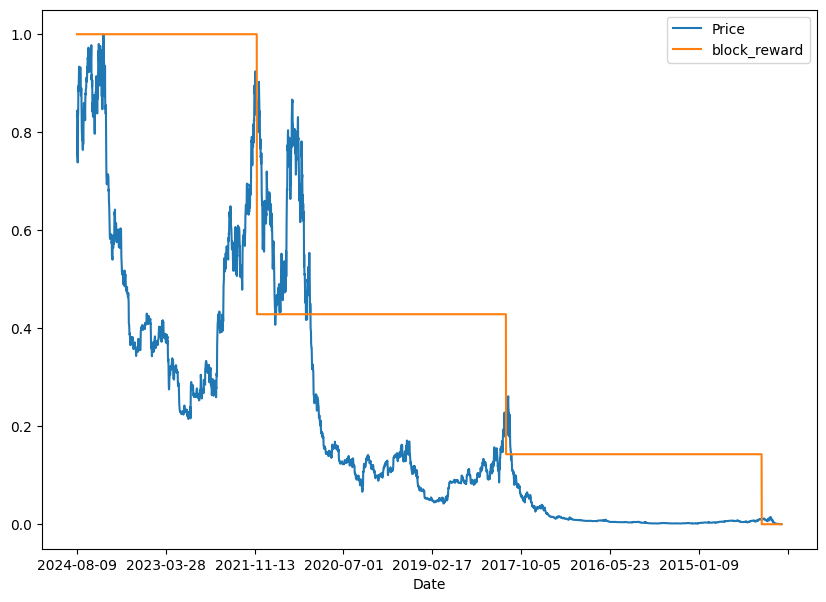

In [88]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [89]:
#Making Window size again
WINDOW_SIZE=7
HORIZON=1

In [90]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2024-08-09,60880.112203,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08,61710.137564,25,60880.112203,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-07,55027.460692,25,61710.137564,60880.112203,NaN,NaN,NaN,NaN,NaN
2024-08-06,56034.316591,25,55027.460692,61710.137564,60880.112203,NaN,NaN,NaN,NaN
2024-08-05,53991.457797,25,56034.316591,55027.460692,61710.137564,60880.112203,NaN,NaN,NaN
2024-08-04,58116.976961,25,53991.457797,56034.316591,55027.460692,61710.137564,60880.112203,NaN,NaN
2024-08-03,60680.094699,25,58116.976961,53991.457797,56034.316591,55027.460692,61710.137564,60880.112203,NaN
2024-08-02,61415.064573,25,60680.094699,58116.976961,53991.457797,56034.316591,55027.460692,61710.137564,60880.112203
2024-08-01,65357.501563,25,61415.064573,60680.094699,58116.976961,53991.457797,56034.316591,55027.460692,61710.137564


In [91]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2024-08-02,25.0,60680.093750,58116.976562,53991.457031,56034.316406,55027.460938,61710.136719,60880.113281
2024-08-01,25.0,61415.066406,60680.093750,58116.976562,53991.457031,56034.316406,55027.460938,61710.136719
2024-07-31,25.0,65357.500000,61415.066406,60680.093750,58116.976562,53991.457031,56034.316406,55027.460938
2024-07-30,25.0,64619.250000,65357.500000,61415.066406,60680.093750,58116.976562,53991.457031,56034.316406
2024-07-29,25.0,66201.015625,64619.250000,65357.500000,61415.066406,60680.093750,58116.976562,53991.457031


In [92]:
y.head()

,Price
Date,
2024-08-02,61415.066406
2024-08-01,65357.500000
2024-07-31,64619.250000
2024-07-30,66201.015625
2024-07-29,66819.914062


In [93]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(3167, 3167, 792, 792)

In [94]:
 #1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

In [95]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [96]:
model_6.evaluate(X_test, y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.2928


15.647916793823242

In [97]:
model_6.summary()

Model: "model_6_dense_multivariate"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,381 (208.52 KB)

 Trainable params: 17,793 (69.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,588 (139.02 KB)

In [98]:
model_6_preds = make_preds(model_6, X_test)
model_6_preds[-10:]

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([122.06815 , 122.54543 , 121.18487 , 119.89335 , 118.86619 ,
       117.72332 , 118.284615, 115.92234 , 106.34496 , 120.792076],
      dtype=float32)>

In [99]:
y_test[-10:]

,Price
Date,
2013-10-10,125.961159
2013-10-09,124.049004
2013-10-08,123.032997
2013-10-07,121.794998
2013-10-06,120.655327
2013-10-05,121.338661
2013-10-04,118.674660
2013-10-03,108.584831
2013-10-02,125.455002


In [100]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results


{'mae': 15.647916,
 'mse': 798.6622,
 'rmse': 28.26061,
 'mape': 3.4952264,
 'mase': 1.1479436}

# Model 7:Ensemble (Stacking Different Models)

Now for this we're going to use combination of different loss function and randomly initialized model

In [101]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [102]:
ensemble_models=get_ensemble_models(num_iter=10,num_epochs=100)

Optimizing model by reducing: mae for 100 epochs, model number: 0
Optimizing model by reducing: mse for 100 epochs, model number: 0
Optimizing model by reducing: mape for 100 epochs, model number: 0
Optimizing model by reducing: mae for 100 epochs, model number: 1
Optimizing model by reducing: mse for 100 epochs, model number: 1
Optimizing model by reducing: mape for 100 epochs, model number: 1
Optimizing model by reducing: mae for 100 epochs, model number: 2
Optimizing model by reducing: mse for 100 epochs, model number: 2
Optimizing model by reducing: mape for 100 epochs, model number: 2
Optimizing model by reducing: mae for 100 epochs, model number: 3
Optimizing model by reducing: mse for 100 epochs, model number: 3
Optimizing model by reducing: mape for 100 epochs, model number: 3
Optimizing model by reducing: mae for 100 epochs, model number: 4
Optimizing model by reducing: mse for 100 epochs, model number: 4
Optimizing model by reducing: mape for 100 epochs, model number: 4
Optim

In [103]:
#make prediction by using ensemble models
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))


In [104]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

<tf.Tensor: shape=(30, 792), dtype=float32, numpy=
array([[417.68982 , 410.19394 , 417.80914 , ..., 136.28427 , 132.48883 ,
        132.01053 ],
       [349.22546 , 378.57178 , 363.29083 , ..., 119.068245, 111.96518 ,
        123.58724 ],
       [353.21735 , 376.86185 , 379.35324 , ..., 119.19318 , 108.678925,
        125.18774 ],
       ...,
       [367.76276 , 380.54498 , 372.5512  , ..., 119.061005, 111.13756 ,
        120.89801 ],
       [337.48502 , 348.33813 , 385.01746 , ..., 117.61357 , 111.49665 ,
        120.34429 ],
       [351.06027 , 376.68094 , 372.05725 , ..., 116.83154 , 107.1563  ,
        125.079605]], dtype=float32)>

In [105]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 14.83974,
 'mse': 859.0571,
 'rmse': 29.309675,
 'mape': 3.2930071,
 'mase': 1.0886552}

One way of getting the 95% condfidnece prediction intervals for a deep learning model is the bootstrap method:

Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble model)
Measure the standard deviation of the predictions
Multiply standard deviation by 1.96 (assuming the distribution is Gaussian, 95% of observations fall within 1.96 standard deviations of the mean, this is why we initialized our neural networks with a normal distribution)
To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

In [106]:
# what if we eant certain range of prediction i.e. upper and lower limit of prediction
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)


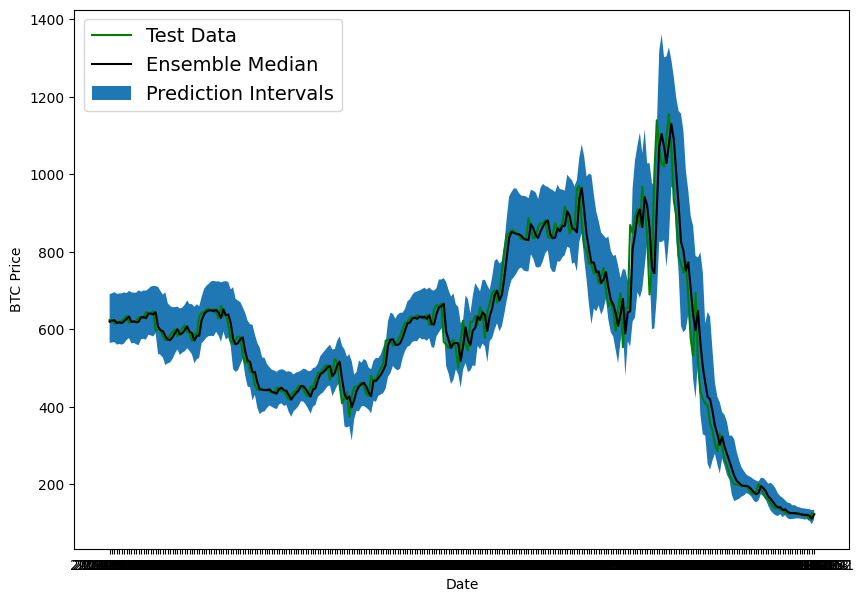

In [107]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);


# Model 8:Training a model on the full historical dataset to make prediction into future

In [108]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2024-08-09,60880.112203,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-08,61710.137564,25,60880.112203,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-07,55027.460692,25,61710.137564,60880.112203,NaN,NaN,NaN,NaN,NaN
2024-08-06,56034.316591,25,55027.460692,61710.137564,60880.112203,NaN,NaN,NaN,NaN
2024-08-05,53991.457797,25,56034.316591,55027.460692,61710.137564,60880.112203,NaN,NaN,NaN


In [109]:

bitcoin_prices_windowed=bitcoin_prices_windowed[::-1]
bitcoin_prices_windowed

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.654990,3.125,125.455000,108.584830,118.674660,121.338660,120.65533,121.79500,123.03300
2013-10-02,125.455000,3.125,108.584830,118.674660,121.338660,120.655330,121.79500,123.03300,124.04900
2013-10-03,108.584830,3.125,118.674660,121.338660,120.655330,121.795000,123.03300,124.04900,125.96116
2013-10-04,118.674660,3.125,121.338660,120.655330,121.795000,123.033000,124.04900,125.96116,125.27966
2013-10-05,121.338660,3.125,120.655330,121.795000,123.033000,124.049000,125.96116,125.27966,125.92750
...,...,...,...,...,...,...,...,...,...
2024-08-05,53991.457797,25,56034.316591,55027.460692,61710.137564,60880.112203,NaN,NaN,NaN
2024-08-06,56034.316591,25,55027.460692,61710.137564,60880.112203,NaN,NaN,NaN,NaN
2024-08-07,55027.460692,25,61710.137564,60880.112203,NaN,NaN,NaN,NaN,NaN


In [110]:
# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop(columns=["Price", "block_reward"]).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()


In [111]:
(y_all)

array([  123.65499   ,   125.455     ,   108.58483   , ...,
       64619.24964922, 65357.50156255, 61415.06457269])

In [112]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [113]:
len(dataset_all)

4

In [144]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_8 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_8.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_8.fit(dataset_all,
            epochs=100,
            verbose=0)

In [145]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

In [146]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [147]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_8,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)
future_forecast[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
Predicting on: 
 [67813.33941633 68255.86576902 66819.91618636 66201.0162264
 64619.24964922 65357.50156255 61415.06457269] -> Prediction: 67143.8125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicting on: 
 [68255.86576902 66819.91618636 66201.0162264  64619.24964922
 65357.50156255 61415.06457269 67143.8125    ] -> Prediction: 66866.6484375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicting on: 
 [66819.91618636 66201.0162264  64619.24964922 65357.50156255
 61415.06457269 67143.8125     66866.6484375 ] -> Prediction: 65747.9765625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicting on: 
 [66201.0162264  64619.24964922 65357.50156255 61415.06457269
 67143.8125     66866.6484375  65747.9765625 ] -> Prediction: 65077.75390625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicting on: 
 [64619.24964922 65357.50156255 61415.06457269 67143.8125
 66866.6484375  65747.9765625  65077.75390625] -> Prediction: 63613.62109375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Pr

67143.81

# Plot future forecast
his is so exciting! Forecasts made!

But right now, they're just numbers on a page.

Let's bring them to life by adhering to the data explorer's motto: visualize, visualize, visualize!

To plot our model's future forecasts against the historical data of Bitcoin, we're going to need a series of future dates (future dates from the final date of where our dataset ends).

How about we create a function to return a date range from some specified start date to a specified number of days into the future (INTO_FUTURE).

To do so, we'll use a combination of NumPy's datetime64 datatype (our Bitcoin dates are already in this datatype) as well as NumPy's timedelta64 method which helps to create date ranges.

In [118]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [119]:
bitcoin_prices=bitcoin_prices[::-1]

In [120]:
last_timestep = bitcoin_prices.index[-1]
last_timestep= pd.to_datetime(last_timestep)
last_timestep

Timestamp('2024-08-09 00:00:00')

In [121]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2024-08-10', '2024-08-11', '2024-08-12', '2024-08-13',
       '2024-08-14', '2024-08-15', '2024-08-16', '2024-08-17',
       '2024-08-18', '2024-08-19', '2024-08-20', '2024-08-21',
       '2024-08-22', '2024-08-23'], dtype='datetime64[D]')

In [122]:
btc_price=bitcoin_prices["Price"]

In [123]:

# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

<ipython-input-123-a35ee6eedd1b>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  future_forecast = np.insert(future_forecast, 0, btc_price[-1])


(array(['2024-08-09', '2024-08-10', '2024-08-11', '2024-08-12',
        '2024-08-13', '2024-08-14', '2024-08-15', '2024-08-16',
        '2024-08-17', '2024-08-18', '2024-08-19', '2024-08-20',
        '2024-08-21', '2024-08-22', '2024-08-23'], dtype='datetime64[D]'),
 array([60880.113, 61496.277, 61024.176, 60568.766, 60154.023, 59899.625,
        59473.934, 59192.867, 58886.016, 58583.47 , 58285.086, 57995.51 ,
        57700.82 , 57412.938, 57125.4  ], dtype=float32))

In [124]:
# # Plot future price predictions of Bitcoin
# plt.figure(figsize=(10, 7))
# plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
# plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")


# Model 9:N-Beats Algorithm

In [125]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [126]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [127]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs


<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [128]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.70232517  0.25201228 -0.00824265  1.2107844  -0.7789525   0.9180966
 -0.73667693]
Forecast: -0.3618227243423462


In [129]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [130]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [131]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [132]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(3167, 3167, 792, 792)

In [133]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset


(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

# Setting up hyperparameters for N-Beats algorithm

In [134]:


# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE


(7, 8)

In [135]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")


Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [148]:

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE,), name="stack_input") # Pass INPUT_SIZE as a tuple

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_9 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_9_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_9.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])



Epoch 236: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 336: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.


In [137]:
model_9.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 684.3726 - mae: 684.3726 - mse: 1255020.6250


[684.3726196289062, 684.3726196289062, 1255020.625]

In [138]:
model_9_preds = make_preds(model_9, test_dataset)
model_9_preds[-10:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([66131.97 , 64977.594, 65432.906, 62037.562, 60227.215, 57498.594,
       53986.395, 54912.94 , 55581.664, 59205.58 ], dtype=float32)>

In [139]:
# Evaluate N-BEATS model predictions
model_9_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_9_preds)
model_9_results

{'mae': 684.37256,
 'mse': 1255020.5,
 'rmse': 1120.277,
 'mape': 1.8916771,
 'mase': 1.0188584}

In [140]:
#Plotting the N-BEATS architecture we've created

In [141]:
# # Plot the N-BEATS model and inspect the architecture
# from tensorflow.keras.utils import plot_model
# plot_model(model_9)

# Comparing Models

In [142]:
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_9_ensemble": ensemble_results,
                              "model_8_NBEATs": model_9_results,
                               }).T
model_results.head(10)



,mae,mse,rmse,mape,mase
naive_model,671.436890,1.222896e+06,1105.846313,1.835240,0.998931
model_1_dense_w7_h1,670.543274,1.237533e+06,1112.444458,1.858195,0.998270
model_2_dense_w30_h1,727.385620,1.333488e+06,1154.767456,2.024143,1.091546
model_3_dense_w30_h7,1431.700073,4.962194e+06,2227.598389,4.059879,2.169258
model_4_CONV1D,687.784851,1.262511e+06,1123.614990,1.894523,1.023938
model_5_LSTM,731.169189,1.395503e+06,1181.314209,2.040265,1.088527
model_6_multivariate,15.647916,7.986622e+02,28.260611,3.495226,1.147944
model_9_ensemble,14.839740,8.590571e+02,29.309675,3.293007,1.088655
model_8_NBEATs,684.372559,1.255020e+06,1120.276978,1.891677,1.018858


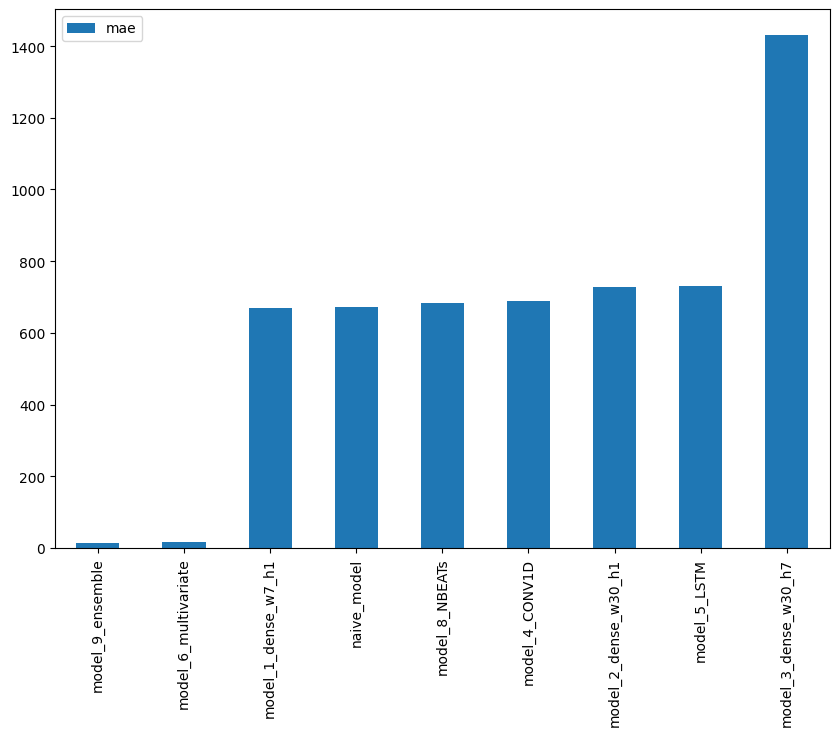

In [143]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");